In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data = pd.read_csv('Results/cleaned_data.csv')

In [3]:
data.shape

(75203, 32)

In [4]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01
1,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
2,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07-01
3,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240,0,Transient,82.00,0,1,Canceled,2015-05-06,2015-07-01
4,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15,0,Transient,105.50,0,0,Canceled,2015-04-22,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75198,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30
75199,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31
75200,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31
75201,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31


In [5]:
stats = data.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
is_canceled,75203.0,0.298765,0.457719,0.00,0.00,0.0,1.0,1.0
lead_time,75203.0,86.838171,85.955738,0.00,18.00,59.0,134.0,629.0
arrival_date_year,75203.0,2016.225044,0.682790,2015.00,2016.00,2016.0,2017.0,2017.0
arrival_date_week_number,75203.0,26.917703,13.370185,1.00,16.00,28.0,37.0,53.0
arrival_date_day_of_month,75203.0,15.794809,8.845003,1.00,8.00,16.0,24.0,31.0
stays_in_weekend_nights,75203.0,1.069638,1.032518,0.00,0.00,1.0,2.0,16.0
stays_in_week_nights,75203.0,2.749837,2.042554,0.00,1.00,2.0,4.0,41.0
adults,75203.0,1.923873,0.519316,0.00,2.00,2.0,2.0,26.0
children,75203.0,0.148744,0.471272,0.00,0.00,0.0,0.0,10.0
babies,75203.0,0.010492,0.113263,0.00,0.00,0.0,0.0,10.0


In [6]:
stats.to_csv('Results/Statistics11.csv', index=False)


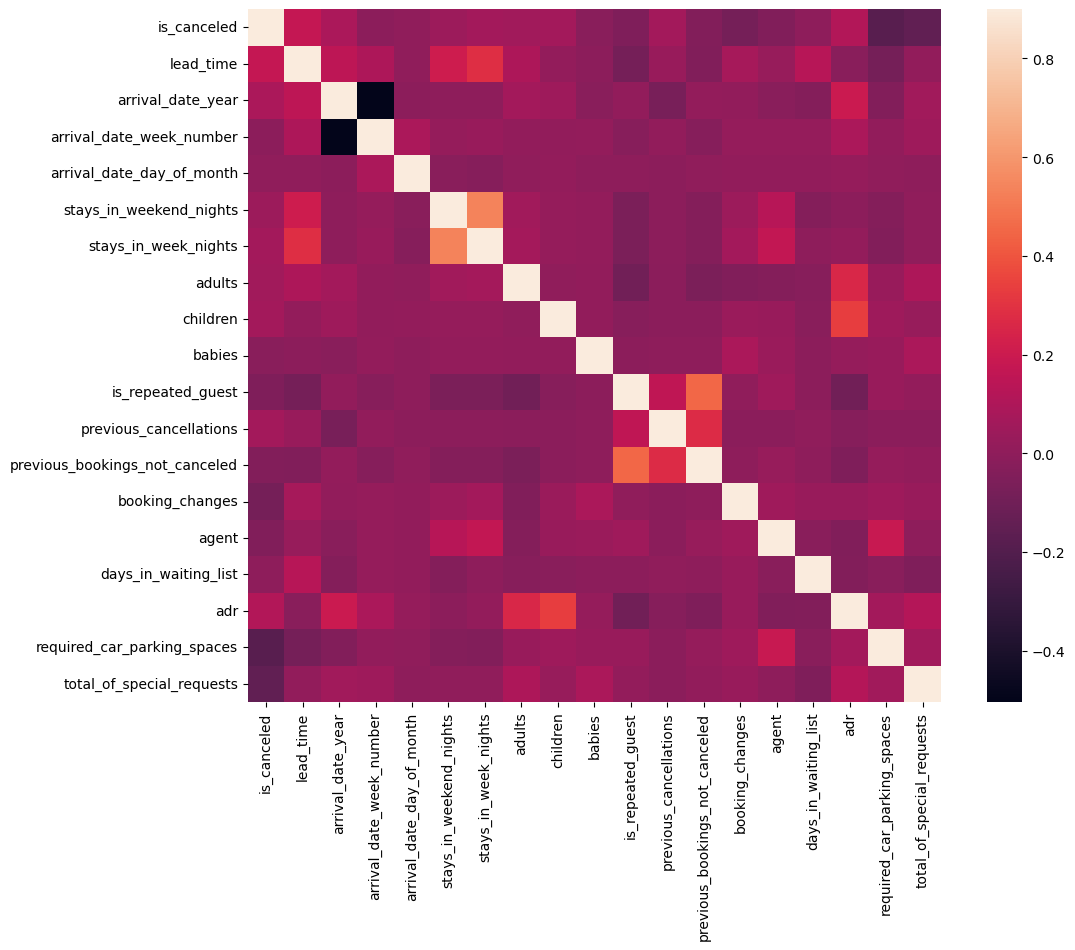

In [7]:
corrmatrix = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmatrix, vmax = .9, square = True)
plt.savefig('Results/correlation.pdf')
plt.show()

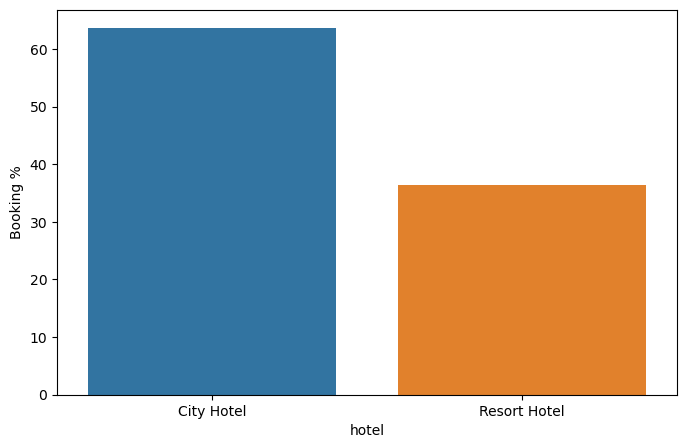

In [8]:
grouped_by_hotel = data.groupby('hotel')
data11 = pd.DataFrame((grouped_by_hotel.size()/data.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = data11['hotel'], y = data11['Booking %'] )
plt.savefig('Results/Barplot2.pdf')
plt.show()

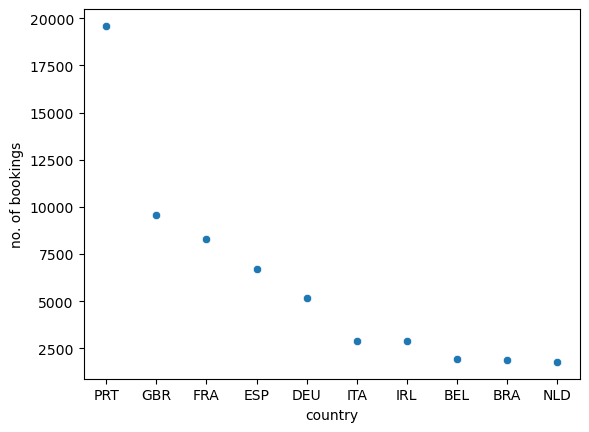

In [9]:
grp_by_country = data.groupby('country')
data2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
data2 = data2[:10]
sns.scatterplot(x = data2.index, y = data2['no. of bookings'])
plt.savefig('Results/Scatterplot2.pdf')
plt.show()

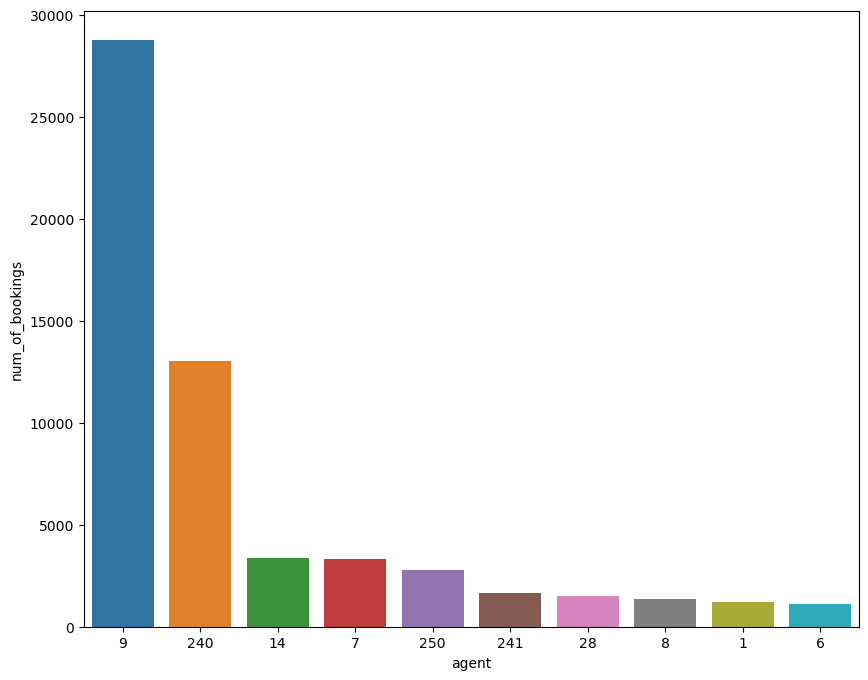

In [10]:
bar = pd.DataFrame(data['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}
                                                                   ).sort_values(by = 'num_of_bookings', ascending = False)
bar.drop(bar[bar['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
bar = bar[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,8))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = bar, order = bar.sort_values('num_of_bookings', ascending = False).agent)
plt.savefig('Results/barplot.pdf')

In [11]:
data["booking_changes"].value_counts()

0     62687
1      8565
2      2823
3       653
4       270
5        82
6        50
7        26
8        14
9         8
10        6
13        5
14        3
15        3
17        2
16        2
12        2
18        1
11        1
Name: booking_changes, dtype: int64

In [12]:
total_booking_changes = data['booking_changes'].count()
total_booking_changes

75203

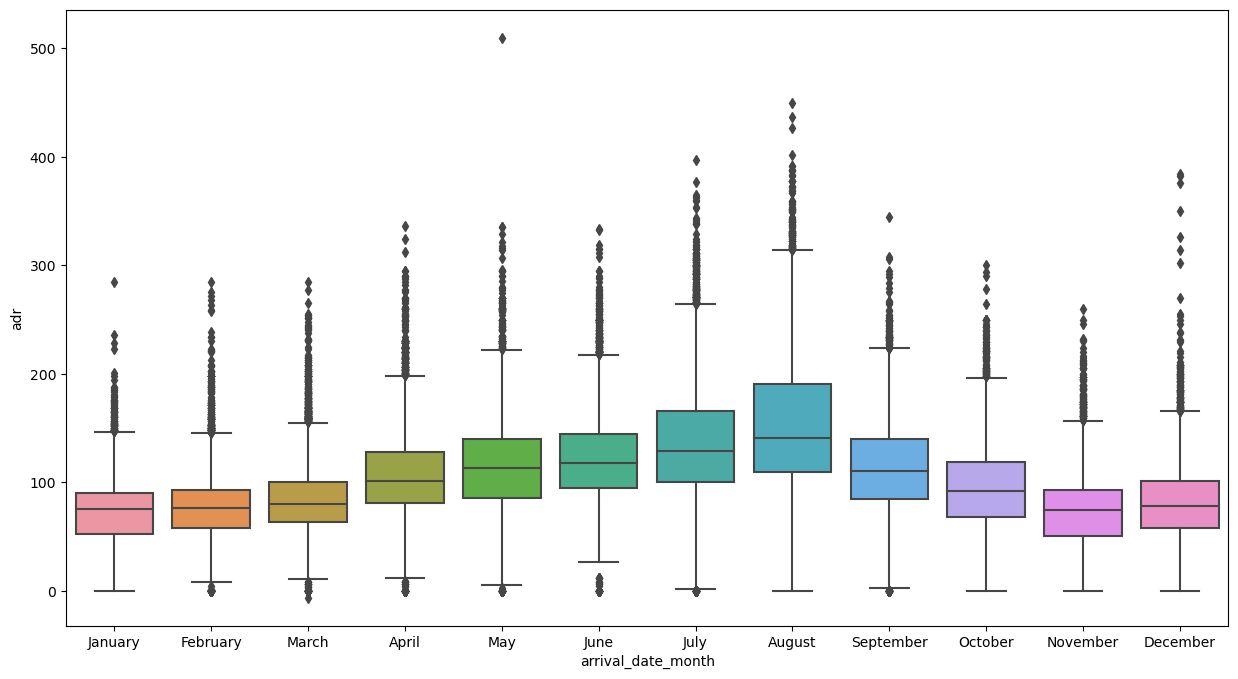

In [14]:
data.drop(data[data['adr'] > 5000].index, inplace = True)
months = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'],categories=months,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = data['arrival_date_month'],y = data['adr'])
plt.savefig('Results/boxplot1.pdf')
plt.show()

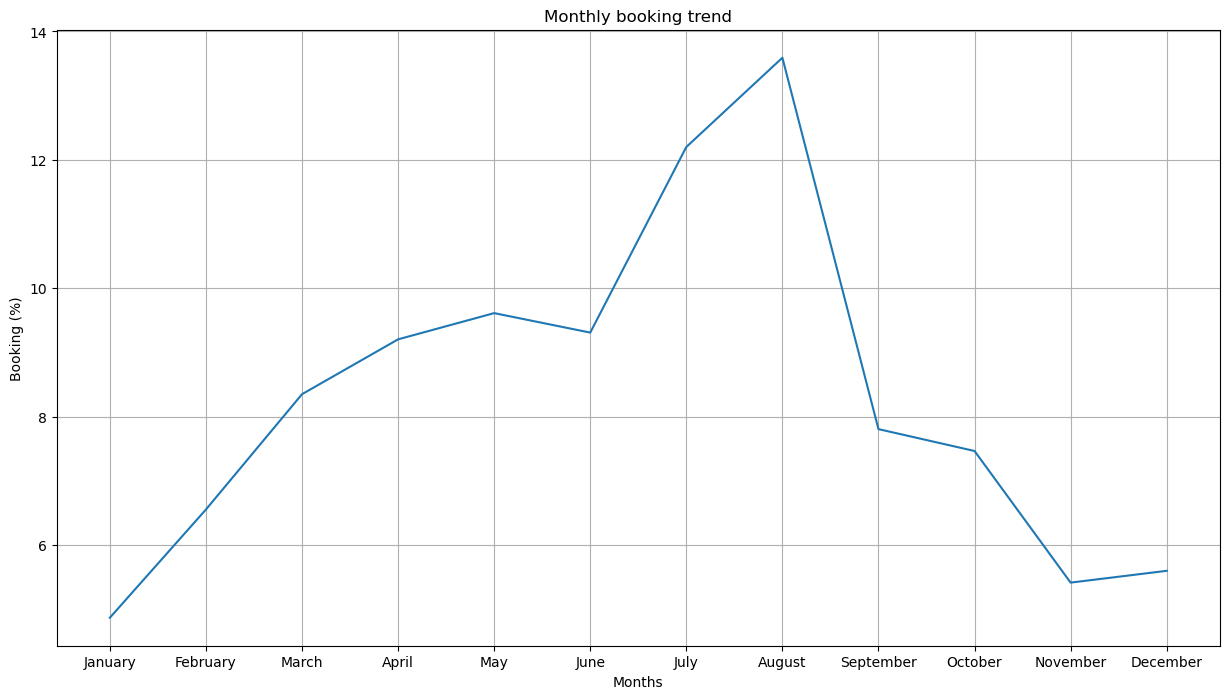

In [15]:
sorted_months = data.arrival_date_month.value_counts().reindex(months)
x = sorted_months.index
y = sorted_months/sorted_months.sum()*100
plt.figure(figsize=(15,8))
plt.xlabel('Months')
plt.ylabel('Booking (%)')
plt.title('Monthly booking trend')
plt.plot(x, y)
plt.grid()
plt.savefig('Results/lineplot.pdf')
plt.show()